Chapter 16

# 区间估计：总体方差未知，均值估计
Book_5《统计至简》 | 鸢尾花书：从加减乘除到机器学习 (第二版)

这段代码演示了在样本标准差未知的情况下（即总体标准差未知时）基于学生 $t$ 分布进行的双侧假设检验。代码通过绘制 $t$ 分布和正态分布的概率密度函数 (PDF) 来说明双侧假设检验中的置信区间和拒绝区域，并计算了在置信水平 $\alpha = 0.05$ 下的临界值。

### 1. 分布和参数设定
首先，生成学生 $t$ 分布的 PDF，假设样本量 $n = 6$，自由度为 $n - 1 = 5$，并使用正态分布的 PDF 进行比较。
$$
f(x) = \frac{\Gamma((n + 1) / 2)}{\sqrt{n\pi} \, \Gamma(n / 2)} \left( 1 + \frac{x^2}{n} \right)^{-(n + 1) / 2}
$$
代码设置双侧显著性水平 $\alpha = 0.05$，并利用学生 $t$ 分布的分位数函数 `stats.t.ppf` 计算临界值 $t_{\alpha/2, n-1}$。

### 2. 绘制双侧检验图
绘制出 $t$ 分布和标准正态分布 $N(0,1)$ 的曲线，以方便比较。确定临界值 $t_{\alpha/2, n-1}$ 后，将位于 $\pm t_{\alpha/2, n-1}$ 之间的区域填充为置信区间（蓝色），在两侧标记拒绝区域（橙色）。

通过这种方式，图形显示了学生 $t$ 分布下的双侧检验的置信区间和拒绝区域，在标准差未知时适用于小样本情况下的显著性检验。

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

In [2]:
## 设置 x 范围
x = np.linspace(start=-4, stop=4, num=200)

In [3]:
n = 6  # 样本大小
f_x_t = stats.t.pdf(x, df=n - 1)  # 计算 t 分布的概率密度函数
f_x_norm = stats.norm.pdf(x)  # 计算标准正态分布的概率密度函数

alpha = 0.05  # 显著性水平

## 获取双尾检验的临界值

In [ ]:
crit_value = stats.t.ppf(q=1 - alpha / 2, df=n - 1)  # 计算双尾检验的临界值

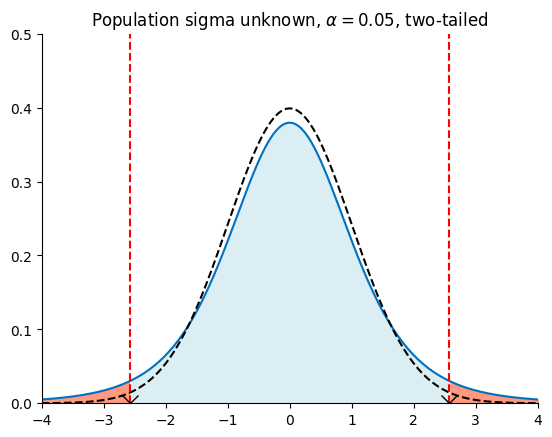

In [5]:
fig, ax = plt.subplots()

plt.plot(x, f_x_t, color="#0070C0")  # 绘制 t 分布曲线
plt.plot(x, f_x_norm, color="k", linestyle='--')  # 绘制标准正态分布曲线

## 填充不拒绝区域
plt.fill_between(x[np.logical_and(x >= -crit_value, x <= crit_value)],
                 f_x_t[np.logical_and(x >= -crit_value, x <= crit_value)],
                 color="#DBEEF3")

## 绘制临界值的垂直线和标记
ax.axvline(x=crit_value, color='r', linestyle='--')
plt.plot(crit_value, 0, marker='x', color='k', markersize=12)
ax.axvline(x=-crit_value, color='r', linestyle='--')
plt.plot(-crit_value, 0, marker='x', color='k', markersize=12)

## 填充拒绝区域
plt.fill_between(x[x <= -crit_value], f_x_t[x <= -crit_value], color="#FF9980")
plt.fill_between(x[x >= crit_value], f_x_t[x >= crit_value], color="#FF9980")

plt.title("Population sigma unknown, $\\alpha = 0.05$, two-tailed")

ax.set_xlim(-4, 4)
ax.set_ylim(0, 0.5)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)